# Introduction à l'analyse de données avec Python (Pandas)

*par [Antoine Mazieres](https://www.antonomase.fr/) et [Julie Pierson](https://letg.cnrs.fr/auteur470.html)*

Ce tutoriel présente la bibliothèque [Pandas](https://pandas.pydata.org/) qui introduit des types de données dans Python très appréciés des statisticiens et *data scientists*, et des fonctions qui facilitent les analyses et visualisations les plus courantes.

Ensuite nous présenterons rapidement quelques bibliothèques supplémentaire qui s'intègrent particulièrement bien avec Pandas pour faire de l'apprentissage aritificel ([scikit-learn](https://scikit-learn.org/stable/)), de l'analyse de réseaux ([networkx](https://networkx.github.io/)) et travailler avec des données géographiques ([geopandas](https://geopandas.org/)).

Ce tutoriel n'a pas l'ambition de vous apprendre ces différentes techniques, mais plutot de vous faire un tour d'horizon de ces outils et de ce qu'il est possible de faire. **Choisissez ce que vous voulez explorer pendant ces 2h30 d'atelier, il n'est nullement nécessaire d'essayer de faire toutes les sections. Prenez ce qui vous intéresse, faites ce qui est proposé ou commencez à explorer des cas d'utilisation qui correspondent davantage à votre futur usage de ces outils.**

## Pandas

### `DataFrame` et `Series`

In [1]:
import pandas as pd

Pandas permet d'utiliser des matrices avec plus d'aisance que la bibliothèque [NumPy](https://numpy.org/) (sur laquelle il est basé par ailleurs). le type de données [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) permet de gérer facilement des noms de colonnes, d'observation et intègre tout un tas de fonctions utiles et bien intégrées.

In [2]:
data = {
    "Bob": {"age": 18, "taille": 190},
    "Alice": {"age": 19, "taille": 185}
}
df = pd.DataFrame(data)
df

,Bob,Alice
age,18,19
taille,190,185


In [3]:
# Transpose
df = df.T
df

,age,taille
Bob,18,190
Alice,19,185


In [4]:
df.mean() # ou .median()

age        18.5
taille    187.5
dtype: float64

Un type de données comparable pour les vecteurs (~matrice avec une seule colonne) est [`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

In [5]:
li = ["a", "b", "c", "d"]

In [6]:
pd.Series(li)

0    a
1    b
2    c
3    d
dtype: object

In [7]:
# Si on sélectionne une colonne d'un DataFrame, cela devient une Series
df['age']

Bob      18
Alice    19
Name: age, dtype: int64

### Importer et exporter des données

Pandas est **très** pratique pour importer et exporter des données depuis/vers un grand nombre de format (CSV, JSON, EXCEL, HDF, SQL, PICKLE, etc.)

In [8]:
df

,age,taille
Bob,18,190
Alice,19,185


In [9]:
# produit un ficher test.csv dans le répertoire courant
df.to_csv("test.csv")

In [10]:
# afficher le contenu du fichier
with open("test.csv") as fi:
    for line in fi:
        print(line.strip()) # .strip() enlève les sauts de ligne

,age,taille
Bob,18,190
Alice,19,185


In [11]:
# import ce fichier directement dans un DataFrame
new_df = pd.read_csv("test.csv", index_col=0)
new_df

,age,taille
Bob,18,190
Alice,19,185


### Jouer avec un exemple

Nous allons nous exercer sur un dataset sur environ 4000 films constitué dans l'idée d'étudier les inégalités de genre dans l'apparition à l'écran dans les films populaires.

In [36]:
# On importe le fichier en indiquant que la première colonne représente l'index
df = pd.read_csv("./datasets/genre_cinema.csv", index_col=0)

In [37]:
# On affiche les premières lignes de la base de données
df.head()

,title,parental_rating,rating_count,rating_value,year,runtime,budget,wwgross,bechdel_test,female_face_ratio
tt0381061,Casino Royale,PG-13,548466,8.0,2006,144,150000000,609447995,1,0.260164
tt0384793,Accepted,PG-13,117939,6.4,2006,93,23000000,38505009,1,0.324739
tt0277434,We Were Soldiers,R,123513,7.1,2002,138,75000000,115374915,3,0.297889
tt0278435,Enough,PG-13,37119,5.7,2002,115,38000000,51801187,NotAvailable,0.423247
tt2361509,The Intern,PG-13,197793,7.1,2015,121,35000000,194564672,3,0.495293


In [38]:
# On affiche le nombre d'observations (lignes) et de variables (colonnes)
df.shape

(3776, 10)

Voici une rapide description des variables :

- les chaines de caractères qui composent l'index, commençant par "tt", représentent l'ID du film sur IMDB. Par exemple : https://www.imdb.com/title/tt0381061/ pour le film "Casino Royale"

- `parental_rating` : censure du film en fonction de l'âge du spectateur ([détails](https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system#:~:text=Rated%20G%3A%20General%20audiences%20%E2%80%93%20All,accompanying%20parent%20or%20adult%20guardian.))

- `rating_count` : le nombre de personnes ayant votés sur IMDB pour attribuer une note au film.

- `rating_value` : la note en question.

- `runtime` : la durée du film en minute

- `budget` : le budget du film, en dollars

- `wwgross` : *world wide gross*, la recette du film, en dollars

- `bechdel_test` : une mesure de la représentation des femmes au cinéma ([détails](https://en.wikipedia.org/wiki/Bechdel_test)), composée de 3 conditions cumulatives : le fait qu'il y est au moins deux femmes dans le film (1), qui se parlent (2), à propos d'autre chose que d'un homme (3). La valeur (0) indique que le film ne remplit aucune des conditions ([source](https://bechdeltest.com/)).

- `female_face_ratio` : une estimation du ratio de visages de femmes qui apparaissent parmi toutes les apparitions de visages à l'écran.



**Quelques exemples de manipulation et de visualisation des données**

Pour la visualisation, Pandas est contruit sur la bibliothèque [`MatPlotLib`](https://matplotlib.org/). Elle est réputée peu intuitive et Pandas contribue à rendre son usage plus simple.
Il faut cependant importer le module :

In [39]:
# créer un raccourci "plt" pour le sous module "pyplot" de matplotlib
from matplotlib import pyplot as plt

Voici un tutoriel complet sur ce qu'offre Pandas en terme de visualisation : https://pandas.pydata.org/docs/user_guide/visualization.html

Explorons ensemble quelques exemples :

In [40]:
# Observer la distribution d'une variable
df['parental_rating'].value_counts()

R        1963
PG-13    1345
PG        408
TV-MA      20
G          16
TV-14      14
NC-17       7
TV-PG       3
Name: parental_rating, dtype: int64

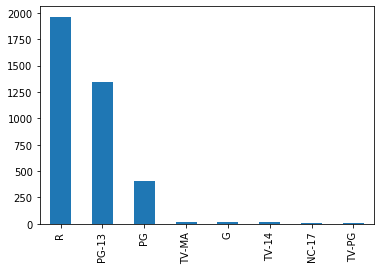

In [41]:
df['parental_rating'].value_counts().plot(kind='bar')

In [42]:
# N'afficher que les films censuré "R"
df[df['parental_rating'] == "R"].head()

,title,parental_rating,rating_count,rating_value,year,runtime,budget,wwgross,bechdel_test,female_face_ratio
tt0277434,We Were Soldiers,R,123513,7.1,2002,138,75000000,115374915,3,0.297889
tt0472399,The Mechanic,R,143967,6.6,2011,93,40000000,76129642,0,0.270884
tt0115632,Basquiat,R,18544,6.9,1996,107,3300000,3011195,2,0.259290
tt0780536,In Bruges,R,370479,7.9,2008,107,15000000,33394440,1,0.282700
tt0264616,Frailty,R,72595,7.2,2001,100,11000000,17423030,NotAvailable,0.247439


In [43]:
# N'afficher que les films censuré "R" qui ont une note IMDB > 7
df[(df['parental_rating'] == "R") & (df['rating_value'] > 7)].head()

,title,parental_rating,rating_count,rating_value,year,runtime,budget,wwgross,bechdel_test,female_face_ratio
tt0277434,We Were Soldiers,R,123513,7.1,2002,138,75000000,115374915,3,0.297889
tt0780536,In Bruges,R,370479,7.9,2008,107,15000000,33394440,1,0.282700
tt0264616,Frailty,R,72595,7.2,2001,100,11000000,17423030,NotAvailable,0.247439
tt1410063,Jin ling shi san chai,R,46662,7.6,2011,146,94000000,2855644,3,0.437312
tt0144117,The Boondock Saints,R,219638,7.8,1999,108,6000000,30471,0,0.235090


In [44]:
# Regrouper les films par année en faisant la moyenne de leurs "female_face_ratio"
df[['year', 'female_face_ratio']].groupby(['year']).mean().head()

,female_face_ratio
year,
1985,0.273275
1986,0.272171
1987,0.265440
1988,0.273346
1989,0.262286


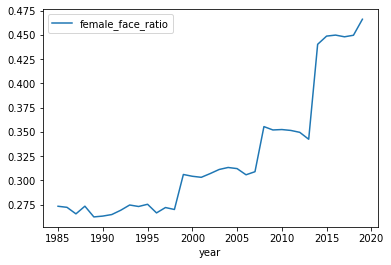

In [45]:
# Visualiser cette évolution
df[['year', 'female_face_ratio']].groupby(['year']).mean().plot()

**Quelques exercices**

Afficher des valeurs ou un plot qui apportent des éléments de réponse aux questions suivantes :

- Quelle est la moyenne du `female_face_ratio` pour les films censurés `PG-13` ?

In [46]:
# le code de votre réponse
df[df['parental_rating'] == 'PG-13']['female_face_ratio'].mean()



0.35678874605535504

- le `female_face_ratio` semble-t-il corrélé à la recette du film ? (indice : [`.plot.scatter()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))

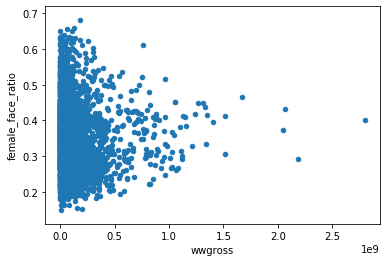

In [47]:
# le code de votre réponse
df.plot.scatter(x='wwgross', y='female_face_ratio')




- Quelle est la proportion de films qui passent le Bechdel test par quartile de valeur des notes sur IMDB ? (indice : [`.qcut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html))

In [90]:
# le code de votre réponse
df_bechdel = df[df['bechdel_test'] != 'NotAvailable']
rating_quartiles = pd.qcut(df_bechdel['rating_value'], 4)
for interval in sorted(set(rating_quartiles.values)):
    print(interval)
    print((df_bechdel[rating_quartiles == interval]['bechdel_test'].astype(int) == 3).mean())
    print()

(1.999, 6.1]
0.6111111111111112

(6.1, 6.7]
0.5371517027863777

(6.7, 7.3]
0.5319488817891374

(7.3, 9.3]
0.5077519379844961



À vous de jouer, essayer de révéler/visualiser quelque chose à partir de ce jeu de données !

In [ ]:
# le code de votre réponse





## GeoPandas

Geopandas est un module Python qui permet d'afficher et de manipuler des données géographiques.

Pour install geopandas, tapez la commande suivante dans un terminal : `python -m pip install geopandas`

In [110]:
import geopandas

Nous allons ici à partir d'un tableau contenant une liste de villes avec leurs coordonnées, afficher ces villes, ajouter un fonds de carte, et joindre des données à ces villes pour en représenter la population sous forme d'une carte en cercles proportionnels.

Les données sont dans un tableau au format CSV : rien de nouveau jusqu'ici !


In [111]:
df = pd.read_csv("./datasets/ne_110m_populated_places_coord.csv", index_col=0)
df.head()

,name,iso_a2,coordonnees
ne_id,,,
1159127243,Vatican City,VA,"41.90001222640, 12.44780838890"
1159146051,San Marino,SM,"43.91715008450, 12.46667028670"
1159146061,Vaduz,LI,"47.13372377430, 9.51666947291"
1159146343,Lobamba,SZ,"-26.46666746140, 31.19999710970"
1159146437,Luxembourg,LU,"49.61166037910, 6.13000280623"


Les latitudes et longitude des villes sont dans une même colonne **coordonnees**.

La 1ère étape va consister à séparer ces coordonnées dans 2 colonnes différentes, afin de pouvoir ensuite facilement visualiser les villes sous forme de points.

Pour cela, nous allons utiliser la fonction **split** (rappelez-vous !) en l'appliquant à toutes les valeurs de la colonne **coordonnees** pour créer 2 colonnes **latitude** et **longitude**.

In [112]:
df[['latitude','longitude']] = df['coordonnees'].str.split(', ',expand=True)
df.head()

,name,iso_a2,coordonnees,latitude,longitude
ne_id,,,,,
1159127243,Vatican City,VA,"41.90001222640, 12.44780838890",41.90001222640,12.44780838890
1159146051,San Marino,SM,"43.91715008450, 12.46667028670",43.91715008450,12.46667028670
1159146061,Vaduz,LI,"47.13372377430, 9.51666947291",47.13372377430,9.51666947291
1159146343,Lobamba,SZ,"-26.46666746140, 31.19999710970",-26.46666746140,31.19999710970
1159146437,Luxembourg,LU,"49.61166037910, 6.13000280623",49.61166037910,6.13000280623


On peut supprimer la colonne coordonnees devenue inutile :


In [113]:
df = df.drop(columns=['coordonnees'])
df.head()

,name,iso_a2,latitude,longitude
ne_id,,,,
1159127243,Vatican City,VA,41.90001222640,12.44780838890
1159146051,San Marino,SM,43.91715008450,12.46667028670
1159146061,Vaduz,LI,47.13372377430,9.51666947291
1159146343,Lobamba,SZ,-26.46666746140,31.19999710970
1159146437,Luxembourg,LU,49.61166037910,6.13000280623


Pour pouvoir que ce dataframe puisse être affiché sous forme de données géographiques, il faut le transformer en geodataframe.

Ceci va y ajouter une colonne **geometry** :

In [114]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['longitude'], df['latitude']))
gdf.head()

,name,iso_a2,latitude,longitude,geometry
ne_id,,,,,
1159127243,Vatican City,VA,41.90001222640,12.44780838890,POINT (12.44781 41.90001)
1159146051,San Marino,SM,43.91715008450,12.46667028670,POINT (12.46667 43.91715)
1159146061,Vaduz,LI,47.13372377430,9.51666947291,POINT (9.51667 47.13372)
1159146343,Lobamba,SZ,-26.46666746140,31.19999710970,POINT (31.20000 -26.46667)
1159146437,Luxembourg,LU,49.61166037910,6.13000280623,POINT (6.13000 49.61166)


On peut maintenant afficher les villes sous forme de points :

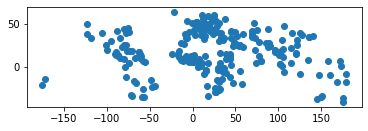

In [115]:
gdf.plot()

Rapide ! Mais on n'y voit pas grand chose. On peut paramétrer les symboles, les axes et beaucoup de choses avec le module matplotlib.

In [116]:
import matplotlib.pyplot as plt

Jetez un oeil ici pour avoir un aperçu : https://darribas.org/gds16/content/labs/lab_02.html

Par exemple comme ceci :

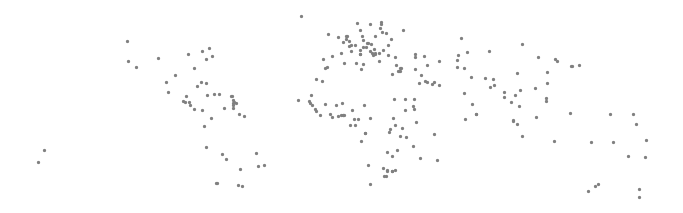

In [117]:
# création d'une figure et de ses axes
f, ax = plt.subplots(1, figsize=(12, 12))
# ajout du geodataframe de villes
gdf.plot(ax=ax, markersize=5, color="gray")
# suppression des axes
ax.set_axis_off()
# affichage
plt.show()

Et en ajoutant un fond de carte :

(il faut install la bibliothèque `descartes` : `python -m pip install descartes`)

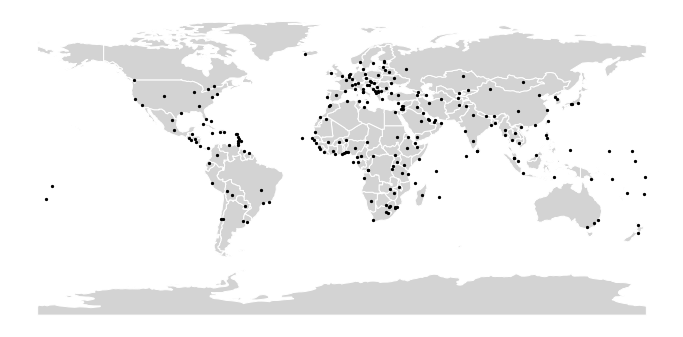

In [119]:
# création d'un geodataframe avec les pays
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# création d'une figure et de ses axes
f, ax = plt.subplots(1, figsize=(12, 12))
# ajout du geodataframe de pays
world.plot(ax=ax, facecolor="lightgray", edgecolor="white")
# ajout du geodataframe de villes
gdf.plot(ax=ax, markersize=5, color="black")
# suppression des axes
ax.set_axis_off()
# affichage
plt.show()

## Analyse de réseau ([networkx](https://networkx.github.io/))

In [105]:
import networkx as nx
import itertools

In [106]:
# declarer le graph
G = nx.Graph()

In [107]:
# créer les noeuds
noeuds = set()
with open("datasets/genres.csv") as fo:
    for line in fo:
        for n in line.strip().split(",")[1:]:
            noeuds.add(n)

for n in noeuds:
    G.add_node(n)

G.nodes

NodeView(('Musical', 'Comedy', 'Adventure', 'Thriller', 'Family', 'War', 'Horror', 'Sport', 'Action', 'Crime', 'Romance', 'Biography', 'Fantasy', 'Mystery', 'Western', 'Drama', 'Music', 'Sci-Fi', 'History'))

In [108]:
# Créér les liens
with open("datasets/genres.csv") as fo:
    for line in fo:
        for n in itertools.combinations(line.strip().split(",")[1:], 2):
            G.add_edge(*n)
            
list(G.edges)[:5]

[('Musical', 'Comedy'),
 ('Musical', 'Romance'),
 ('Musical', 'Adventure'),
 ('Musical', 'Family'),
 ('Musical', 'Fantasy')]

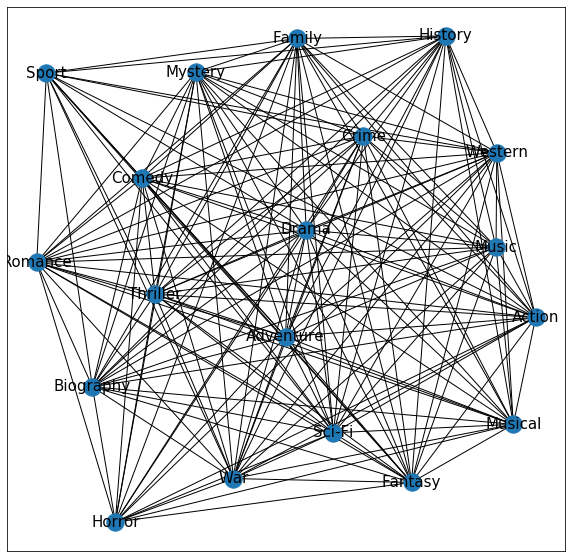

In [109]:
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx(G, with_labels=True, font_size=15)

C'est moche et ça ne dit pas grand chose ! À vous de faire mieux : essayez de rajouter des attributs aux noeuds et/ou aux liens afin de faire ressortir les attachements préférentiels entre les genre de films.

Vous trouverez ce dont vous avez besoin ici : https://networkx.github.io/documentation/stable/tutorial.html#

In [ ]:
# le code de votre réponse





## Apprentissage artificiel ([scikit-learn](https://scikit-learn.org/stable/))

Avec Python, l'apprentissage artificiel est rendu assez facile avec la bibliothèque [scikit-learn](https://scikit-learn.org/stable/). Nous allons rapidement passer sur quelques scénarios d'usage classique du *machine learning*, à savoir : la réduction de dimensionalité, le regroupement et la classification.

Pour ce faire, nous allons travailler avec la même base de données mais avec un nombre réduit de variable.

In [ ]:
df_min = df[['rating_count', 'rating_value', 'runtime', 'wwgross', 'female_face_ratio']]

### Réduction de dimensionalité

Pour cet exemple nous allons utiliser une analyse en composante principale pour représenter les données en seulement deux dimensions.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
# Normaliser le dataset
df_norm = (df_min - df_min.mean()) / df_min.std()

In [ ]:
# calculer la PCA
pca = PCA(n_components='mle')
pca_res = pca.fit_transform(df_norm.values)

In [ ]:
# observer la variance expliquée par les composantes
ebouli = pd.Series(pca.explained_variance_ratio_)
ebouli.plot(kind='bar', title="Ebouli des valeurs propres")
plt.show()

In [ ]:
# observer les corrélations entre variables et composantes

def circleOfCorrelations(pc_infos, ebouli):
    plt.Circle((0,0), radius=10, color='g', fill=False)
    circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    for idx in range(len(pc_infos["PC-0"])):
        x = pc_infos["PC-0"][idx]
        y = pc_infos["PC-1"][idx]
        plt.plot([0.0,x],[0.0,y],'k-')
        plt.plot(x, y, 'rx')
        plt.annotate(pc_infos.index[idx], xy=(x,y))
    plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
    plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.title("Circle of Correlations")


coef = np.transpose(pca.components_)
cols = ['PC-'+str(x) for x in range(len(ebouli))]
pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
circleOfCorrelations(pc_infos, ebouli)
plt.show()

### Regroupement

Nous allons utiliser l'algorithme des K-moyennes, mais la plupart des procédures de regroupement sont disponibles sur scikit-learn : https://scikit-learn.org/stable/modules/clustering.html#clustering

In [ ]:
from scipy import cluster

In [ ]:
nb_clusters = 3

# Calcul des centroids
centroids, _ = cluster.vq.kmeans(df_min.values, nb_clusters, iter=100)

idx, _ = cluster.vq.vq(df_min.values, centroids)

Nous pouvons visualiser ces clusters en utilisant les deux composantes principales révélées par la PCA.

In [ ]:
dat = pd.DataFrame(pca_res, columns=cols)

for clust in set(idx):
    colors = list("bgrcmyk")
    plt.scatter(dat["PC-0"][idx==clust],dat["PC-1"][idx==clust],c=colors[clust])
plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
plt.title("K-Means / PCA")
plt.show()

### Classification

En utilisant un algorithme de classification classique, les arbres de décision, nous allons essayer de classifier les films censurés "R" des autres.

De nombreux autres algorithmes d'apprentissage supervisé sont disponibles sur scikit-learn : https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [ ]:
from sklearn import tree

In [ ]:
# déclarer le classifieur
clf = tree.DecisionTreeClassifier()

In [ ]:
# construction du modèle
clf = clf.fit(df_min.values, (df['parental_rating'] == "R").astype(int))

In [ ]:
# visualisation du modèle
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, max_depth=2)
plt.show()